In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# load netcdf file
ds_raw = xr.open_dataset('../data/5901429_prof.nc')
ds_raw

<xarray.Dataset> Size: 1MB
Dimensions:                       (N_PROF: 190, N_PARAM: 3, N_LEVELS: 84,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2019-10-30T22:47:29Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In [3]:
# how to select a variable from xarray
ds_raw.TEMP_ADJUSTED

<xarray.DataArray 'TEMP_ADJUSTED' (N_PROF: 190, N_LEVELS: 84)> Size: 64kB
[15960 values with dtype=float32]
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Sea temperature in-situ ITS-90 scale
    standard_name:   sea_water_temperature
    units:           degree_Celsius
    valid_min:       -2.5
    valid_max:       40.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

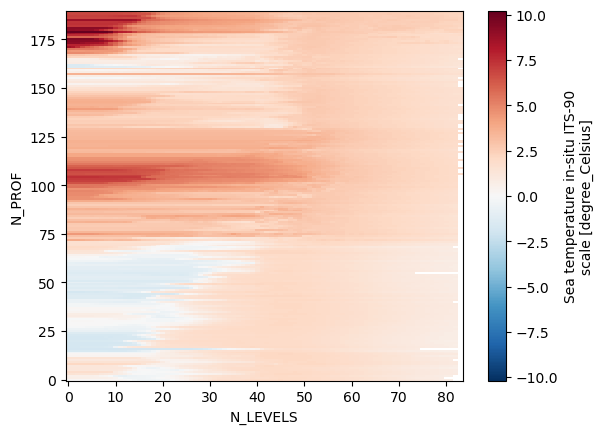

In [4]:
# how to plot a variable of xarray
ds_raw.TEMP_ADJUSTED.plot()

In [5]:
# select a few key variables and make xarray dataset using them
variables = ['PRES_ADJUSTED', 'TEMP_ADJUSTED', 'PSAL_ADJUSTED', 'LATITUDE', 'LONGITUDE', 'JULD']
ds = ds_raw[variables]
ds

<xarray.Dataset> Size: 196kB
Dimensions:        (N_PROF: 190, N_LEVELS: 84)
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables:
    PRES_ADJUSTED  (N_PROF, N_LEVELS) float32 64kB ...
    TEMP_ADJUSTED  (N_PROF, N_LEVELS) float32 64kB ...
    PSAL_ADJUSTED  (N_PROF, N_LEVELS) float32 64kB ...
    LATITUDE       (N_PROF) float64 2kB ...
    LONGITUDE      (N_PROF) float64 2kB ...
    JULD           (N_PROF) datetime64[ns] 2kB ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2019-10-30T22:47:29Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In [6]:
# change variable names to make more sense
ds = ds.rename({'PRES_ADJUSTED':'pressure', 'TEMP_ADJUSTED':'temperature', 'PSAL_ADJUSTED':'salinity', 'LATITUDE':'latitude', 'LONGITUDE':'longitude', 'JULD': 'time'})

In [7]:
ds

<xarray.Dataset> Size: 196kB
Dimensions:      (N_PROF: 190, N_LEVELS: 84)
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables:
    pressure     (N_PROF, N_LEVELS) float32 64kB ...
    temperature  (N_PROF, N_LEVELS) float32 64kB ...
    salinity     (N_PROF, N_LEVELS) float32 64kB ...
    latitude     (N_PROF) float64 2kB ...
    longitude    (N_PROF) float64 2kB ...
    time         (N_PROF) datetime64[ns] 2kB ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2019-10-30T22:47:29Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In [8]:
# make time a dimension
ds = ds.swap_dims({'N_PROF':'time'})

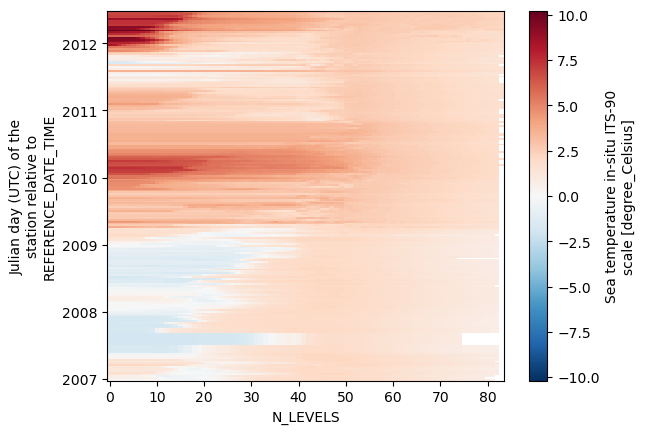

In [9]:
ds.temperature.plot()

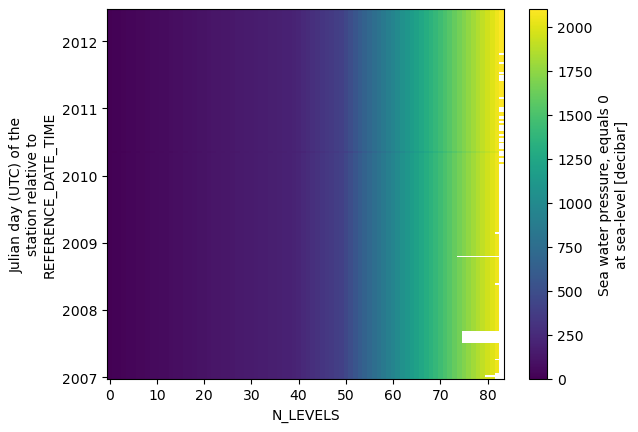

In [10]:
ds.pressure.plot()

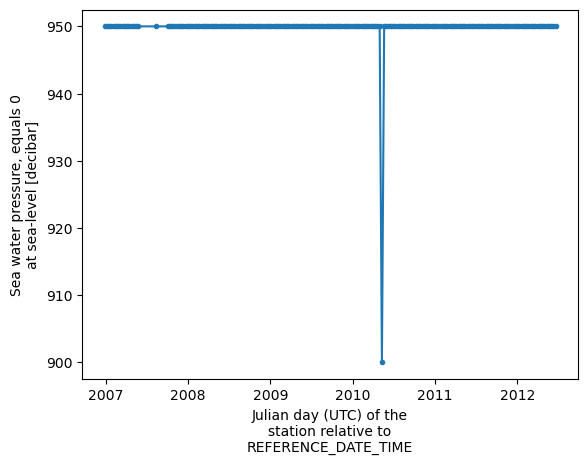

In [11]:
# select pressure values at a specific N_LEVEL
ds.pressure.isel(N_LEVELS=60).plot(marker='.')

In [12]:
# create depth variable using existing pressure variable
depth = ds.pressure.median(dim='time')

In [13]:
# make depth a dimension, like time
ds['depth'] = depth
ds = ds.swap_dims({'N_LEVELS':'depth'})
ds

<xarray.Dataset> Size: 196kB
Dimensions:      (time: 190, depth: 84)
Coordinates:
  * time         (time) datetime64[ns] 2kB 2006-12-28T01:30:26 ... 2012-06-18...
  * depth        (depth) float32 336B 5.0 10.0 15.0 ... 2e+03 2.05e+03 2.1e+03
Data variables:
    pressure     (time, depth) float32 64kB 5.0 10.0 15.0 ... 2.05e+03 2.1e+03
    temperature  (time, depth) float32 64kB ...
    salinity     (time, depth) float32 64kB ...
    latitude     (time) float64 2kB ...
    longitude    (time) float64 2kB ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2019-10-30T22:47:29Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

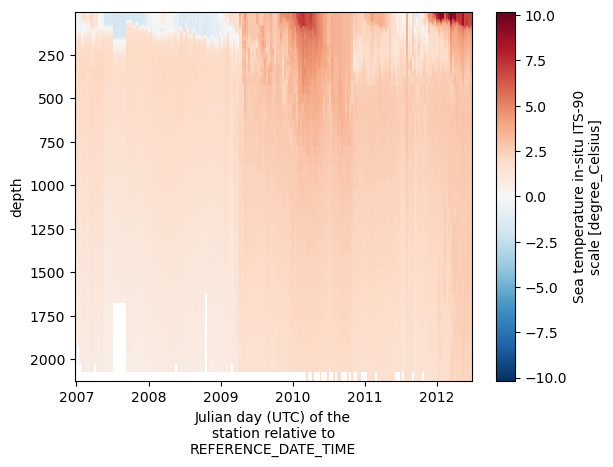

In [14]:
# temperature plot with respect to time and depth
ds.temperature.plot(x='time', y='depth', yincrease=False)

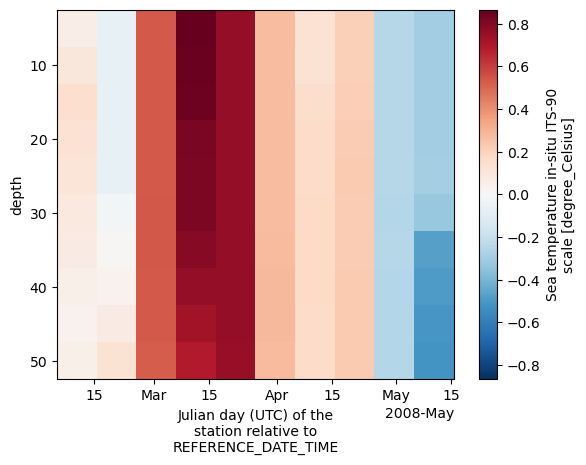

In [15]:
# using a slice to plot part of the time-depth-temperature plot
ds.temperature.isel(time=slice(30,40), depth=slice(0,10)).plot(x='time', y='depth', yincrease=False)

In [16]:
# select by a value instead of index
ds.temperature.sel(time='2008-04-04T01:30:26.000000000', method='nearest')

<xarray.DataArray 'temperature' (depth: 84)> Size: 336B
[84 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2008-03-31T13:12:24
  * depth    (depth) float32 336B 5.0 10.0 15.0 20.0 ... 2e+03 2.05e+03 2.1e+03
Attributes:
    long_name:       Sea temperature in-situ ITS-90 scale
    standard_name:   sea_water_temperature
    units:           degree_Celsius
    valid_min:       -2.5
    valid_max:       40.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

In [17]:
ds.time

<xarray.DataArray 'time' (time: 190)> Size: 2kB
array(['2006-12-28T01:30:26.000000000', '2007-01-06T13:35:48.000000000',
       '2007-01-16T13:35:59.000000000', '2007-01-26T13:43:25.000000000',
       '2007-02-05T14:24:34.000000000', '2007-02-15T13:46:58.000000000',
       '2007-02-25T13:33:32.000000000', '2007-03-07T13:40:25.999999744',
       '2007-03-17T13:32:25.999999744', '2007-03-27T13:31:57.000000000',
       '2007-04-06T13:54:41.000000256', '2007-04-16T13:30:36.999999744',
       '2007-04-26T13:40:53.000000000', '2007-05-06T13:40:11.000000000',
       '2007-05-16T13:35:12.000000000', '2007-05-26T13:28:47.000000000',
       '2007-08-14T13:54:27.000000000', '2007-10-03T13:43:26.000000256',
       '2007-10-13T13:20:27.000000000', '2007-10-23T13:35:58.000000000',
       '2007-11-02T13:28:14.000000000', '2007-11-12T13:22:56.000000000',
       '2007-11-22T13:18:29.000000000', '2007-12-02T13:18:17.000000000',
       '2007-12-12T14:27:57.000000000', '2007-12-22T13:17:07.000000000',
       '2008-01-01T13:16:33.999999744', '2008-01-11T13:16:00.000000000',
       '2008-01-21T13:15:21.000000000', '2008-01-31T13:14:47.000000000',
       '2008-02-10T13:39:34.000000000', '2008-02-20T13:14:31.000000000',
       '2008-03-01T13:43:44.000000000', '2008-03-11T13:36:50.000000000',
       '2008-03-21T13:11:44.000000000', '2008-03-31T13:12:24.000000000',
       '2008-04-10T13:17:03.000000000', '2008-04-20T13:09:59.999999744',
       '2008-04-30T13:09:43.000000000', '2008-05-10T13:56:49.000000000',
       '2008-05-20T13:19:26.000000256', '2008-05-30T13:07:45.000000000',
       '2008-06-09T13:57:53.000000000', '2008-06-19T13:29:37.000000000',
       '2008-06-29T13:07:18.000000000', '2008-07-09T13:30:59.000000000',
       '2008-07-19T13:16:52.000000000', '2008-07-29T13:05:09.000000000',
       '2008-08-08T13:32:27.000000000', '2008-08-18T13:18:14.000000000',
       '2008-08-28T13:08:09.000000000', '2008-09-07T13:13:50.000000000',
       '2008-09-17T13:01:22.000000000', '2008-09-27T13:00:41.999999744',
       '2008-10-07T13:01:28.000000000', '2008-10-17T12:29:16.000000000',
       '2008-10-27T13:00:05.000000000', '2008-11-06T12:58:23.000000000',
       '2008-11-16T12:57:56.000000000', '2008-11-26T12:57:18.000000000',
       '2008-12-06T12:56:47.000000000', '2008-12-16T13:45:12.000000000',
       '2008-12-26T13:06:05.999999744', '2009-01-05T12:55:15.000000000',
       '2009-01-15T13:06:20.000000000', '2009-01-25T12:54:03.999999744',
       '2009-02-04T12:53:18.000000000', '2009-02-14T13:04:03.000000000',
       '2009-02-24T12:56:16.000000000', '2009-03-06T12:51:34.000000000',
       '2009-03-16T12:53:02.000000256', '2009-03-26T12:50:17.000000000',
       '2009-04-05T13:00:17.000000000', '2009-04-15T13:50:22.999999744',
       '2009-04-25T13:32:40.000000000', '2009-05-05T12:53:27.000000000',
       '2009-05-15T12:57:05.000000000', '2009-05-25T12:47:31.000000000',
       '2009-06-04T12:46:50.000000000', '2009-06-14T12:57:12.000000000',
       '2009-06-24T12:53:16.000000000', '2009-07-04T12:47:25.999999744',
       '2009-07-14T12:45:35.000000000', '2009-07-24T12:44:23.000000256',
       '2009-08-03T12:45:42.000000000', '2009-08-13T12:42:47.000000000',
       '2009-08-23T13:23:46.000000000', '2009-09-02T13:05:34.000000000',
       '2009-09-12T12:41:08.000000256', '2009-09-22T12:40:40.000000000',
       '2009-10-02T13:00:51.000000000', '2009-10-12T12:39:52.000000000',
       '2009-10-22T13:18:09.000000000', '2009-11-01T12:39:17.000000000',
       '2009-11-11T12:37:46.000000000', '2009-11-21T12:37:07.000000000',
       '2009-12-01T12:59:43.000000000', '2009-12-11T12:36:46.000000000',
       '2009-12-21T12:40:51.000000000', '2009-12-31T12:41:04.000000256',
       '2010-01-10T12:34:08.000000000', '2010-01-20T12:33:19.000000000',
       '2010-01-30T13:10:46.999999744', '2010-02-09T12:37:38.000000000',
       '2010-02-19T13:06:50.000000000', '2010-03-01T12:48:50.000000000',
       '2010-03-11T12:30:37.000000000', '2010-03-21T13:21:22.000000000',
       '20

In [18]:
a = np.arange(3)
a

array([0, 1, 2])

In [19]:
# making xarray object from a NumPy array
xa = xr.DataArray(a, dims=['time'])

In [20]:
xa

<xarray.DataArray (time: 3)> Size: 12B
array([0, 1, 2])
Dimensions without coordinates: time